In [4]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

#Settings for Pandas
pd.options.display.max_rows=10
pd.options.display.float_format = "{:.1f}".format

In [5]:
print(tf.__version__)

2.3.1


In [25]:
#Import Dataset
training_df = pd.read_csv('./dataset/housing.csv')
#Scale the label
training_df["median_house_value"] /= 1000.0
training_df["ocean_proximity"] = training_df["ocean_proximity"].astype("category")
training_df["ocean_proximity"] = training_df["ocean_proximity"].cat.codes
print(training_df["total_bedrooms"].isnull().sum())
training_df = training_df.dropna()
training_df.head()

207


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.2,37.9,41.0,880.0,129.0,322.0,126.0,8.3,452.6,3
1,-122.2,37.9,21.0,7099.0,1106.0,2401.0,1138.0,8.3,358.5,3
2,-122.2,37.9,52.0,1467.0,190.0,496.0,177.0,7.3,352.1,3
3,-122.2,37.9,52.0,1274.0,235.0,558.0,219.0,5.6,341.3,3
4,-122.2,37.9,52.0,1627.0,280.0,565.0,259.0,3.8,342.2,3


In [26]:
#Describe the dataframe
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0,20433.0
mean,-119.6,35.6,28.6,2636.5,537.9,1424.9,499.4,3.9,206.9,1.2
std,2.0,2.1,12.6,2185.3,421.4,1133.2,382.3,1.9,115.4,1.4
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0,0.0
25%,-121.8,33.9,18.0,1450.0,296.0,787.0,280.0,2.6,119.5,0.0
50%,-118.5,34.3,29.0,2127.0,435.0,1166.0,409.0,3.5,179.7,1.0
75%,-118.0,37.7,37.0,3143.0,647.0,1722.0,604.0,4.7,264.7,1.0
max,-114.3,42.0,52.0,39320.0,6445.0,35682.0,6082.0,15.0,500.0,4.0


In [27]:
#Functions for building the model
def build_model(learning_rate):
    #Call on Keras's sequential model
    model = tf.keras.models.Sequential()
    
    #Topography of model. Single node on
    #Single node, single layer
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
    
    #Compile the model into code that tensorflow can execute.
    #Configure training to minimize models mean squared error
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate),loss="mean_squared_error",
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [28]:
#Functions for training the model
def train_model(model,df,features,label,epochs,batch_size):
    history = model.fit(x=df[features],y=df[label],batch_size=batch_size,epochs=epochs)
    
    #Gather the trained weights and bias
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    #The epochs are stored separately from rest of the history
    epochs = history.epoch
    
    #Isolate error for each epoch
    hist = pd.DataFrame(history.history)
    
    #To track progression of the training, we will take snapshot
    #of model's root mean squared error at each epoch
    rmse = hist["root_mean_squared_error"]
    
    return trained_weight,trained_bias,epochs,rmse

In [29]:
#Plotting functions
def plot_the_model(trained_weight,trained_bias,features,label):
    plt.xlabel(features)
    plt.ylabel(label)
    
    #Scatter plot for 200 random points
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[features],random_examples[label])
    
    #Draw the model line from x0,y0 to x1,y1
    x0 = 0
    y0 = trained_bias
    x1 = 10000
    y1 = trained_bias + (trained_weight*x1)
    plt.plot([x0,x1],[y0,y1],c='r')
    
    plt.show()

def plot_the_loss_curve(epochs,rmse):
    #Plot loss vs epochs
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Root mean squared error")
    
    plt.plot(epochs,rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97,rmse.max()])
    plt.show()

Epoch 1/150
682/682 [==============================] - 0s 687us/step - loss: 50948.7031 - root_mean_squared_error: 225.7182
Epoch 2/150
682/682 [==============================] - 0s 715us/step - loss: 37548.4727 - root_mean_squared_error: 193.7743
Epoch 3/150
682/682 [==============================] - 1s 733us/step - loss: 26628.1934 - root_mean_squared_error: 163.1815
Epoch 4/150
682/682 [==============================] - 0s 732us/step - loss: 18084.4668 - root_mean_squared_error: 134.4785
Epoch 5/150
682/682 [==============================] - 0s 668us/step - loss: 12095.5010 - root_mean_squared_error: 109.9795
Epoch 6/150
682/682 [==============================] - 0s 708us/step - loss: 8496.3682 - root_mean_squared_error: 92.1757
Epoch 7/150
682/682 [==============================] - 0s 652us/step - loss: 7169.1792 - root_mean_squared_error: 84.6710
Epoch 8/150
682/682 [==============================] - 0s 636us/step - loss: 7015.6572 - root_mean_squared_error: 83.7595
Epoch 9/150
68

682/682 [==============================] - 0s 674us/step - loss: 7011.9888 - root_mean_squared_error: 83.7376
Epoch 68/150
682/682 [==============================] - 0s 652us/step - loss: 7011.8315 - root_mean_squared_error: 83.7367
Epoch 69/150
682/682 [==============================] - 0s 693us/step - loss: 7011.8730 - root_mean_squared_error: 83.7369
Epoch 70/150
682/682 [==============================] - 0s 681us/step - loss: 7011.9858 - root_mean_squared_error: 83.7376
Epoch 71/150
682/682 [==============================] - 0s 681us/step - loss: 7011.7256 - root_mean_squared_error: 83.7360
Epoch 72/150
682/682 [==============================] - 0s 661us/step - loss: 7012.0176 - root_mean_squared_error: 83.7378
Epoch 73/150
682/682 [==============================] - 0s 658us/step - loss: 7011.8940 - root_mean_squared_error: 83.7371
Epoch 74/150
682/682 [==============================] - 0s 701us/step - loss: 7012.0146 - root_mean_squared_error: 83.7378
Epoch 75/150
682/682 [=======

682/682 [==============================] - 0s 707us/step - loss: 7011.5693 - root_mean_squared_error: 83.7351
Epoch 133/150
682/682 [==============================] - 0s 709us/step - loss: 7011.8599 - root_mean_squared_error: 83.7368
Epoch 134/150
682/682 [==============================] - 0s 696us/step - loss: 7011.8877 - root_mean_squared_error: 83.7370
Epoch 135/150
682/682 [==============================] - 0s 686us/step - loss: 7012.0967 - root_mean_squared_error: 83.7383
Epoch 136/150
682/682 [==============================] - 0s 701us/step - loss: 7011.7900 - root_mean_squared_error: 83.7364
Epoch 137/150
682/682 [==============================] - 0s 681us/step - loss: 7011.7383 - root_mean_squared_error: 83.7361
Epoch 138/150
682/682 [==============================] - 0s 640us/step - loss: 7011.5825 - root_mean_squared_error: 83.7352
Epoch 139/150
682/682 [==============================] - 0s 672us/step - loss: 7011.6323 - root_mean_squared_error: 83.7355
Epoch 140/150
682/682 

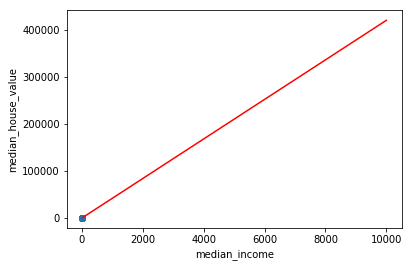

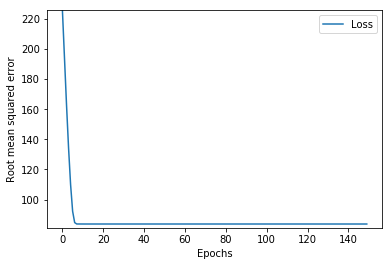

In [45]:
#Calling the model
#Define hyperparameters
learning_rate = 0.01
epochs = 150
batch_size = 30

#Creating a synthetic feature
training_df["rooms_per_person"] = training_df["total_rooms"]/training_df["population"]

#Feature and Label
#my_feature = "total_rooms"
#my_feature = "rooms_per_person"
my_feature = "median_income"
my_label = "median_house_value"

#Discard pre-existing values of model
my_model = None
my_model = build_model(learning_rate)
weight,bias,epochs,rmse = train_model(my_model,training_df,my_feature,my_label,epochs,batch_size)

print("Learned weight of model = ",weight)
print("Learned bias of model = ",bias)

plot_the_model(weight,bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

In [31]:
def predict_house_value(n,feature,label):
    "Predict house value based on a feature"
    
    batch = training_df[feature][10000:10000+n]
    predicted_values = my_model.predict_on_batch(x=batch)
    
    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")
    
    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [43]:
predict_house_value(10,my_feature,my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2    210             208
    2    182             205
    3    206             214
    2    195             215
    3    195             201
    3    362             168
    2    187             190
    2    157             207
    2    180             180
    2    172             183


In [44]:
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.3,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.2,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,-0.0,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,-0.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,0.0,0.0,1.0,0.7,-0.0,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.1,0.2
ocean_proximity,-0.3,0.2,0.1,-0.0,-0.0,-0.1,-0.0,-0.0,0.1,1.0,0.1
